<a href="https://colab.research.google.com/github/Slim205/Acoustic/blob/main/Final_Mesh_Project_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pollution and dispersion error of the finite element method


#  The error as a function of h :

1


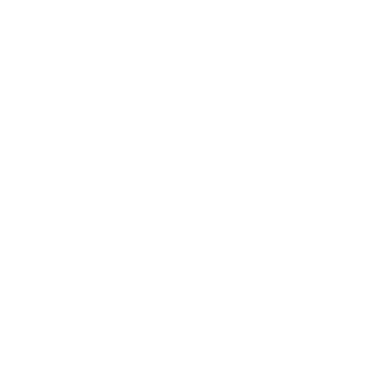

2


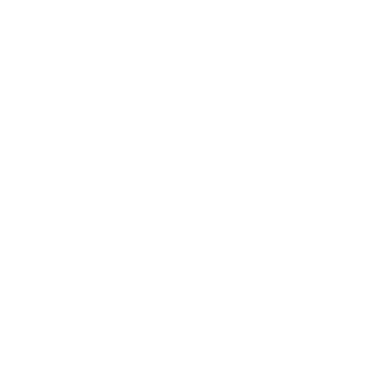

3


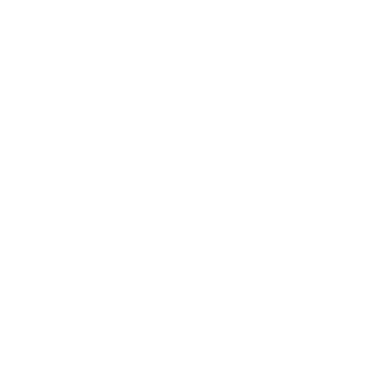

4


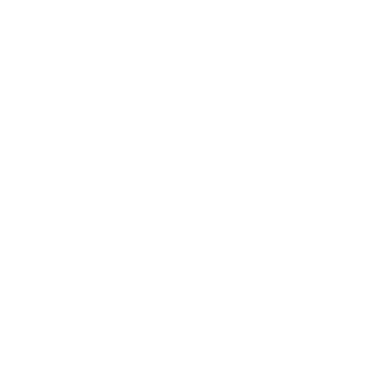

5


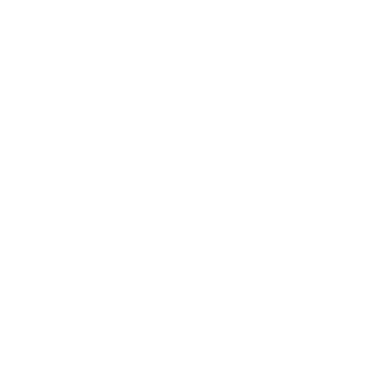

6


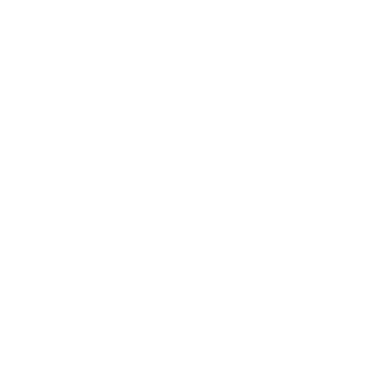

7


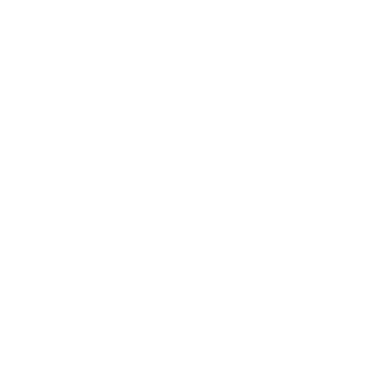

8


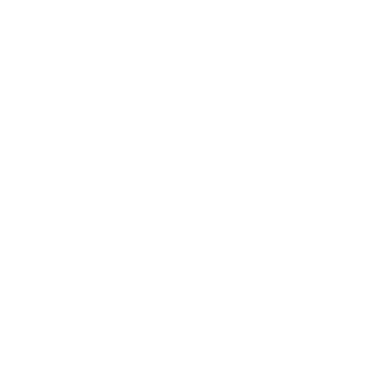

9


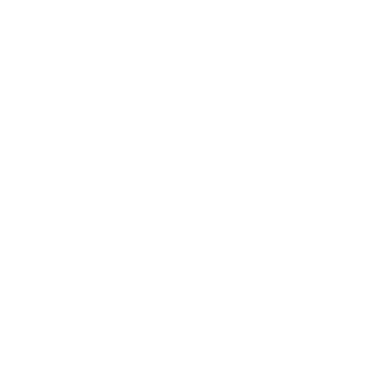

End.


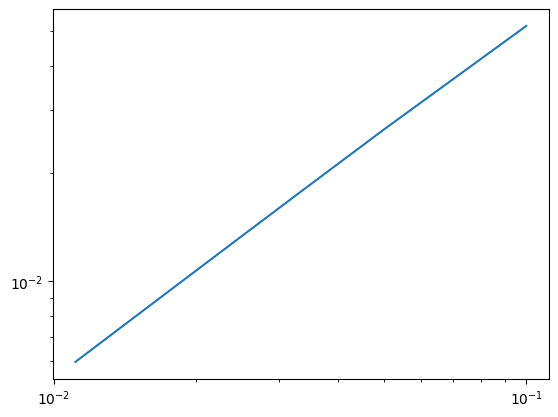

In [ ]:
# -*- coding: utf-8 -*-
"""
..warning:: The explanations of the functions in this file and the details of
the programming methodology have been given during the lectures.
"""


# Python packages
import matplotlib.pyplot
import matplotlib.pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy
import os
import scipy.io
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import sys


# MRG packages
import zsolutions4students as solutions


# ..todo: Uncomment for displaying limited digits
# numpy.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})


def run_exercise_solution_helmholtz_dddd(n):

    # -- set equation parameters
    wavenumber = numpy.pi
        # -- set geometry parameters
    xmin, xmax, ymin, ymax = 0.0, 1.0, 0.0, 1.0
    nelemsx, nelemsy = n,n

    # -- generate mesh
    nnodes = (nelemsx + 1) * (nelemsy + 1)
    nelems = nelemsx * nelemsy * 2
    node_coords, p_elem2nodes, elem2nodes, node_l2g = solutions._set_square_trimesh(xmin, xmax, ymin, ymax, nelemsx, nelemsy)
    nnodes = node_coords.shape[0]
    nelems = len(p_elem2nodes)-1

    # -- plot mesh
    fig = matplotlib.pyplot.figure(1)
    ax = matplotlib.pyplot.subplot(1, 1, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    #solutions._plot_mesh(p_elem2nodes, elem2nodes, node_coords, color='orange')
    matplotlib.pyplot.show()

    # -- set boundary geometry
    # boundary composed of nodes
    # .. todo:: Modify the lines below to select the ids of the nodes on the boundary of the different geometry.
    nodes_on_north = solutions._set_square_nodes_boundary_north(node_coords)
    nodes_on_south = solutions._set_square_nodes_boundary_south(node_coords)
    nodes_on_east = solutions._set_square_nodes_boundary_east(node_coords)
    nodes_on_west = solutions._set_square_nodes_boundary_west(node_coords)
    nodes_on_boundary = numpy.unique(numpy.concatenate((nodes_on_north, nodes_on_south, nodes_on_east, nodes_on_west)), )

    # ..warning: for teaching purpose only
    # -- set exact solution
    solexact = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    laplacian_of_solexact = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    for i in range(nnodes):
        x, y, z = node_coords[i, 0], node_coords[i, 1], node_coords[i, 2]
        # set: u(x,y) = e^{ikx}
        solexact[i] = numpy.exp(complex(0,1)*wavenumber*x)
        laplacian_of_solexact[i] = complex(0,1)*wavenumber*complex(0,1)*wavenumber * solexact[i]
    # ..warning: end

    # -- set dirichlet boundary conditions
    values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    values_at_nodes_on_boundary[nodes_on_boundary] = solexact[nodes_on_boundary]

    # -- set finite element matrices and right hand side
    f_unassembled = numpy.zeros((nnodes, 1), dtype=numpy.complex128)

    # ..warning: for teaching purpose only
    for i in range(nnodes):
        # evaluate: (-\Delta - k^2) u(x,y) = ...
        f_unassembled[i] = - laplacian_of_solexact[i] - (wavenumber ** 2) * solexact[i]
    # ..warning: end

    coef_k = numpy.ones((nelems, 1), dtype=numpy.complex128)
    coef_m = numpy.ones((nelems, 1), dtype=numpy.complex128)
    K, M, F = solutions._set_fem_assembly(p_elem2nodes, elem2nodes, node_coords, f_unassembled, coef_k, coef_m)
    A = K - wavenumber**2 * M
    B = F

    # -- apply Dirichlet boundary conditions
    A, B = solutions._set_dirichlet_condition(nodes_on_boundary, values_at_nodes_on_boundary, A, B)

    # -- solve linear system
    sol = scipy.linalg.solve(A, B)

    # -- plot finite element solution
    solreal = sol.reshape((sol.shape[0], ))
    # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solreal))
    # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solreal))
    #
    # ..warning: for teaching purpose only
    # -- plot exact solution
    solexactreal = solexact.reshape((solexact.shape[0], ))
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solexactreal))
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solexactreal))
    # # ..warning: end

    # ..warning: for teaching purpose only
    # -- plot exact solution - approximate solution
    solerr = solreal - solexactreal
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solerr))
   # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solerr))
    # # ..warning: end

    return numpy.linalg.norm(solerr)

import matplotlib.pyplot as plt
import numpy as np
if __name__ == '__main__':
    l=[]
    x= []
    for i in range(1,10) :
      print(i)
      p= i*10
      x.append(1/p)
      l.append(run_exercise_solution_helmholtz_dddd(p))

    plt.loglog(x,l)
    print('End.')


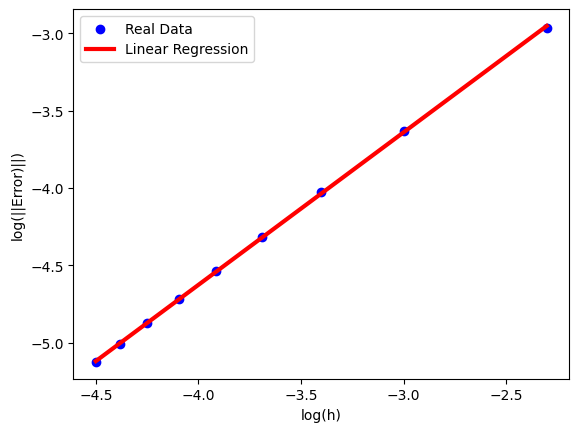

Polynomial Coefficients: [ 0.98574275 -0.68323799]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Reshape the input data
X = np.log(x)
Y = np.log(l)


# Assuming you have x and l defined somewhere in your code
# x = ...
# l = ...

# Degree of the polynomial you want to fit
degree = 1  # Change this to the desired degree of the polynomial

# Fit the polynomial regression model using polyfit
coefficients = np.polyfit(X, Y, degree)

# Create the polynomial approximation function
poly_function = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(X), max(X), 10)

# Compute corresponding y values using the polynomial function
y_values = poly_function(x_values)

# Plot the real data and the polynomial approximation
plt.scatter(X, Y, color='blue', label='Real Data')  # Real data points
plt.plot(x_values, y_values, color='red', linewidth=3, label='Linear Regression')  # Polynomial regression line
plt.xlabel('log(h)')
plt.ylabel('log(Error)')
plt.legend()
plt.show()

# Print the coefficients of the polynomial regression model
print("Polynomial Coefficients:", coefficients)


4


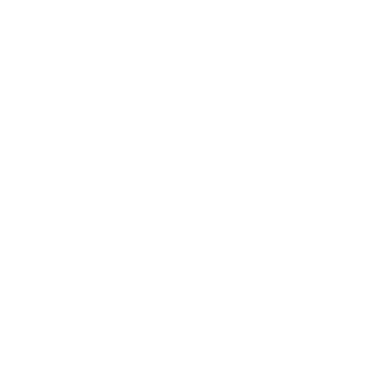

5


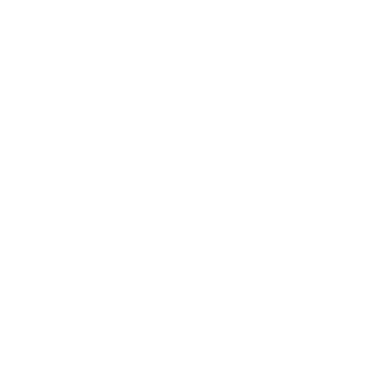

6


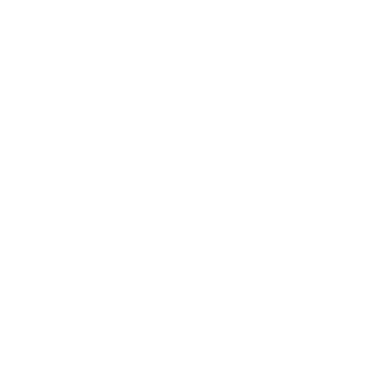

7


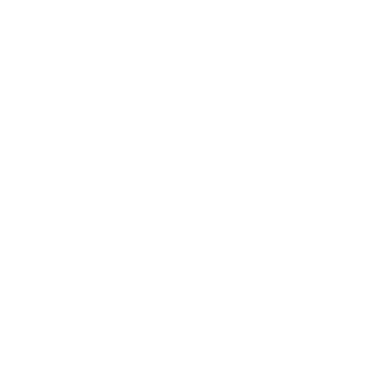

8


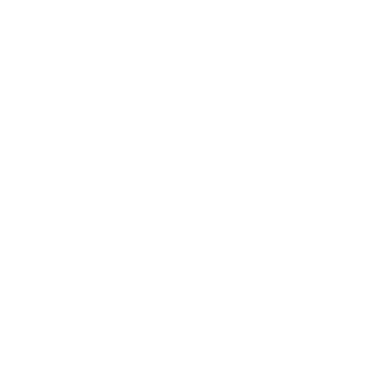

9


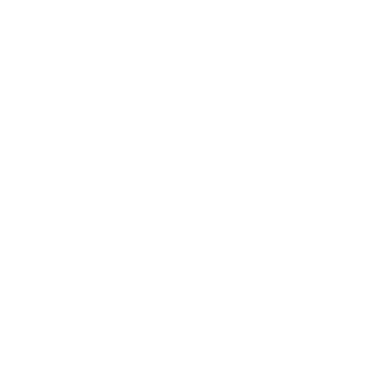

10


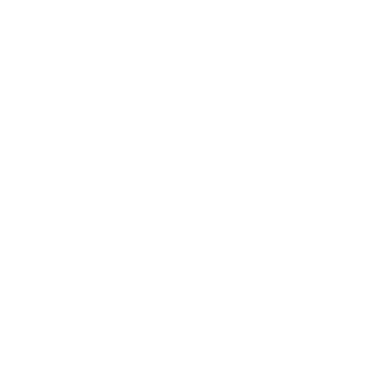

11


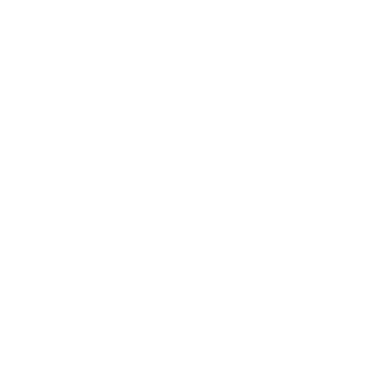

12


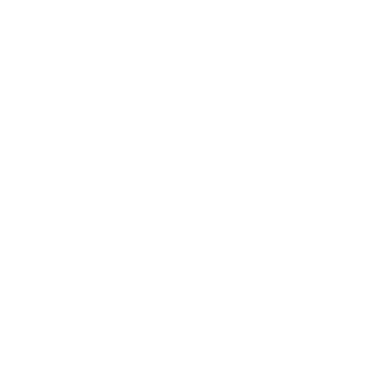

13


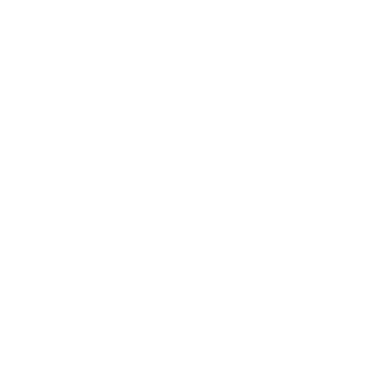

14


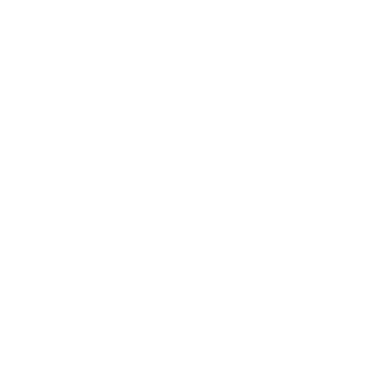

15


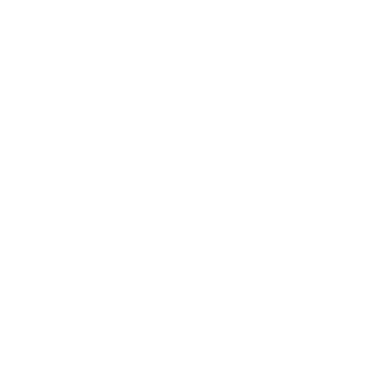

16


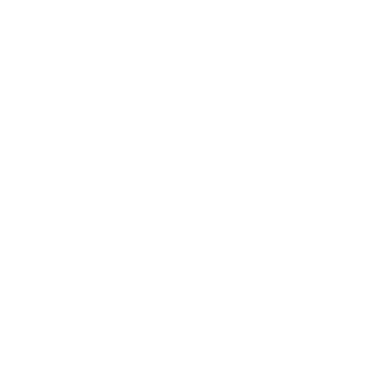

17


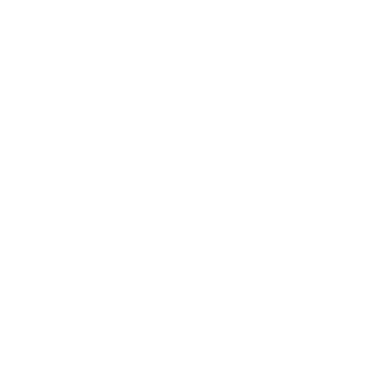

18


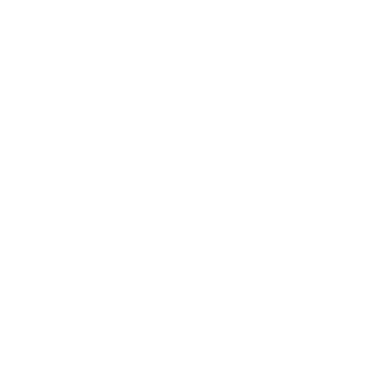

19


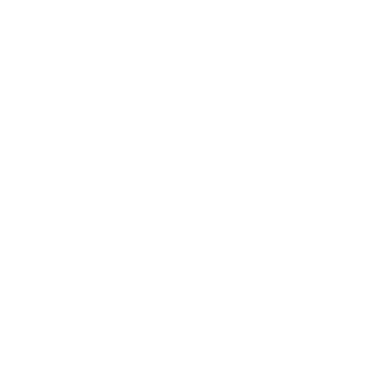

End.


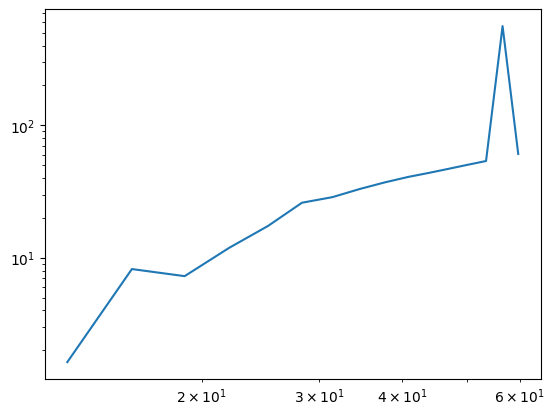

In [ ]:
def run_exercise_solution_helmholtz_dddd(wave):
    n = 80
    # -- set equation parameters
    wavenumber = wave
    # -- set geometry parameters
    xmin, xmax, ymin, ymax = 0.0, 1.0, 0.0, 1.0
    nelemsx, nelemsy = n,n

    # -- generate mesh
    nnodes = (nelemsx + 1) * (nelemsy + 1)
    nelems = nelemsx * nelemsy * 2
    node_coords, p_elem2nodes, elem2nodes, node_l2g = solutions._set_square_trimesh(xmin, xmax, ymin, ymax, nelemsx, nelemsy)
    # .. todo:: Modify the line below to define a different geometry.
    # p_elem2nodes, elem2nodes, node_coords, node_l2g = ...
    nnodes = node_coords.shape[0]
    nelems = len(p_elem2nodes)-1

    # -- plot mesh
    fig = matplotlib.pyplot.figure(1)
    ax = matplotlib.pyplot.subplot(1, 1, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    #solutions._plot_mesh(p_elem2nodes, elem2nodes, node_coords, color='orange')
    matplotlib.pyplot.show()

    # -- set boundary geometry
    # boundary composed of nodes
    # .. todo:: Modify the lines below to select the ids of the nodes on the boundary of the different geometry.
    nodes_on_north = solutions._set_square_nodes_boundary_north(node_coords)
    nodes_on_south = solutions._set_square_nodes_boundary_south(node_coords)
    nodes_on_east = solutions._set_square_nodes_boundary_east(node_coords)
    nodes_on_west = solutions._set_square_nodes_boundary_west(node_coords)
    nodes_on_boundary = numpy.unique(numpy.concatenate((nodes_on_north, nodes_on_south, nodes_on_east, nodes_on_west)), )
    # ..warning: the ids of the nodes on the boundary should be 'global' number.
    # nodes_on_boundary = ...

    # ..warning: for teaching purpose only
    # -- set exact solution
    solexact = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    laplacian_of_solexact = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    for i in range(nnodes):
        x, y, z = node_coords[i, 0], node_coords[i, 1], node_coords[i, 2]
        # set: u(x,y) = e^{ikx}
        teta = numpy.pi /2
        solexact[i] = numpy.exp(complex(numpy.cos(teta),numpy.sin(teta))*wavenumber*x)
        #solexact[i] = x**2+y**2
        #laplacian_of_solexact[i] = 4

        laplacian_of_solexact[i] = complex(numpy.cos(teta),numpy.sin(teta))*wavenumber*complex(numpy.cos(teta),numpy.sin(teta))*wavenumber * solexact[i]
    # ..warning: end

    # -- set dirichlet boundary conditions
    values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    values_at_nodes_on_boundary[nodes_on_boundary] = solexact[nodes_on_boundary]

    # -- set finite element matrices and right hand side
    f_unassembled = numpy.zeros((nnodes, 1), dtype=numpy.complex128)

    # ..warning: for teaching purpose only
    for i in range(nnodes):
        # evaluate: (-\Delta - k^2) u(x,y) = ...
        f_unassembled[i] = - laplacian_of_solexact[i] - (wavenumber ** 2) * solexact[i]
    # ..warning: end

    coef_k = numpy.ones((nelems, 1), dtype=numpy.complex128)
    coef_m = numpy.ones((nelems, 1), dtype=numpy.complex128)
    K, M, F = solutions._set_fem_assembly(p_elem2nodes, elem2nodes, node_coords, f_unassembled, coef_k, coef_m)
    A = K - wavenumber**2 * M
    B = F

    # -- apply Dirichlet boundary conditions
    A, B = solutions._set_dirichlet_condition(nodes_on_boundary, values_at_nodes_on_boundary, A, B)

    # -- solve linear system
    sol = scipy.linalg.solve(A, B)

    # -- plot finite element solution
    solreal = sol.reshape((sol.shape[0], ))
    # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solreal))
    # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solreal))
    #
    # ..warning: for teaching purpose only
    # -- plot exact solution
    solexactreal = solexact.reshape((solexact.shape[0], ))
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solexactreal))
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solexactreal))
    # # ..warning: end

    # ..warning: for teaching purpose only
    # -- plot exact solution - approximate solution
    solerr = solreal - solexactreal
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solerr))
   # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solerr))
    # # ..warning: end

    return numpy.linalg.norm(solerr)

import matplotlib.pyplot as plt
import numpy as np
if __name__ == '__main__':
    l1=[]
    x1= []
    for i in range(4,20) :
      print(i)
      p= numpy.pi*i
      x1.append(p)
      l1.append(run_exercise_solution_helmholtz_dddd(p))

    plt.loglog(x1,l1)
    print('End.')


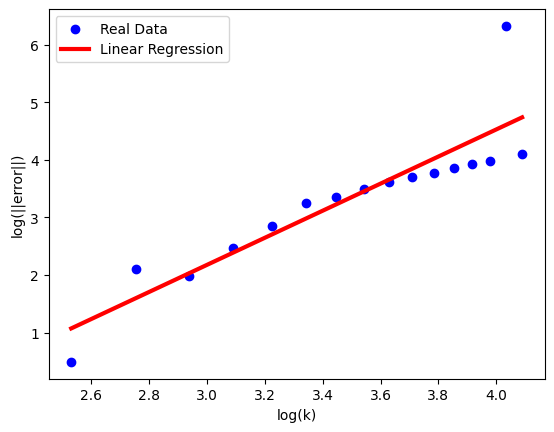

Polynomial Coefficients: [ 2.35491694 -4.88929369]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Reshape the input data
X = np.log(x1)
Y = np.log(l1)


# Assuming you have x and l defined somewhere in your code
# x = ...
# l = ...

# Degree of the polynomial you want to fit
degree = 1  # Change this to the desired degree of the polynomial

# Fit the polynomial regression model using polyfit
coefficients = np.polyfit(X, Y, degree)

# Create the polynomial approximation function
poly_function = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(X), max(X), 10)

# Compute corresponding y values using the polynomial function
y_values = poly_function(x_values)

# Plot the real data and the polynomial approximation
plt.scatter(X, Y, color='blue', label='Real Data')  # Real data points
plt.plot(x_values, y_values, color='red', linewidth=3, label='Linear Regression')  # Polynomial regression line
plt.xlabel('log(k)')
plt.ylabel('log(||error||)')
plt.legend()
plt.show()

# Print the coefficients of the polynomial regression model
print("Polynomial Coefficients:", coefficients)


# Shifting the mesh

In [ ]:
epsilon = np.random.rand((200)**2)

def shift(node_coords, p_elem2nodes, elem2nodes,epsilon=epsilon):
    n =  int(np.sqrt(node_coords.shape[0]))-1
    nnodes = node_coords.shape[0]
    b1 = [n+ i*(n+1) for i in range(n+1)]
    b2 = [i for i in range(n+1)]
    b3 = [(n+1)*n+ i for i in range(n+1)]
    b4 = [ i*(n+1) for i in range(n+1)]
    b = b1+b2+b3+b4
    for i in range(nnodes) :
      if i not in b :
        x = (2*epsilon[i]-1)/3/n
        for j in range(2):
          node_coords[i][j]+= x

    return node_coords, p_elem2nodes, elem2nodes

1.3938468501173522
0.8786796564403575
1.168660560949306
0.8322209332674413


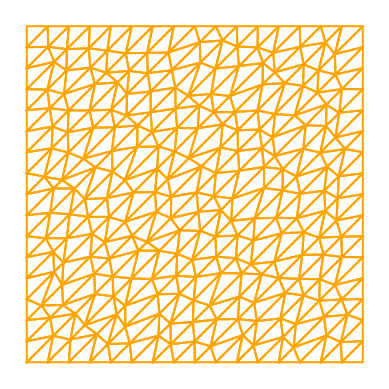

In [ ]:
def incircle_radius(a, b, c):
    s = (a + b + c) / 2  # Semi-perimeter
    A = np.sqrt(s * (s - a) * (s - b) * (s - c))  # Area of the triangle
    r = A / s  # Radius of the incircle
    return r
def compute_aspect_ratio_of_element_triangle(node_coords, p_elem2nodes, elem2nodes,elem):
    nodes=elem2nodes[p_elem2nodes[elem]:p_elem2nodes[elem+1]]
    l=[]
    for i in range(3):
      l.append(np.sqrt(((node_coords[nodes[i]]-node_coords[nodes[(i+1)%3]])**2).sum()))
    h= max(l)
    alpha = np.sqrt(3)/6
    rau = (sum(l)-2*max(l))/2
    return alpha*h/rau
def compute_edge_length_factor_of_element_triangle(node_coords, p_elem2nodes, elem2nodes,elem):
    nodes=elem2nodes[p_elem2nodes[elem]:p_elem2nodes[elem+1]]
    l=[]
    for i in range(3) :
      l.append(np.sqrt(((node_coords[nodes[i]]-node_coords[nodes[(i+1)%3]])**2).sum()))
    return min(l)*len(l)/sum(l)

def run_exercise_b(n):
    wavenumber = numpy.pi
        # -- set geometry parameters
    xmin, xmax, ymin, ymax = 0.0, 1.0, 0.0, 1.0
    nelemsx, nelemsy = n,n

    # -- generate mesh
    nnodes = (nelemsx + 1) * (nelemsy + 1)
    nelems = nelemsx * nelemsy * 2
    node_coords, p_elem2nodes, elem2nodes, node_l2g = solutions._set_square_trimesh(xmin, xmax, ymin, ymax, nelemsx, nelemsy)
    elem = n
    print( compute_aspect_ratio_of_element_triangle(node_coords, p_elem2nodes, elem2nodes,elem) )

    print( compute_edge_length_factor_of_element_triangle(node_coords, p_elem2nodes, elem2nodes,elem))
    node_coords, p_elem2nodes, elem2nodes = shift(node_coords, p_elem2nodes, elem2nodes)
    elem = n
    print( compute_aspect_ratio_of_element_triangle(node_coords, p_elem2nodes, elem2nodes,elem) )

    print( compute_edge_length_factor_of_element_triangle(node_coords, p_elem2nodes, elem2nodes,elem))
    nnodes = node_coords.shape[0]
    nelems = len(p_elem2nodes)-1

    # -- plot mesh
    fig = matplotlib.pyplot.figure(1)
    ax = matplotlib.pyplot.subplot(1, 1, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    solutions._plot_mesh(p_elem2nodes, elem2nodes, node_coords, color='orange')


run_exercise_b(16)



1


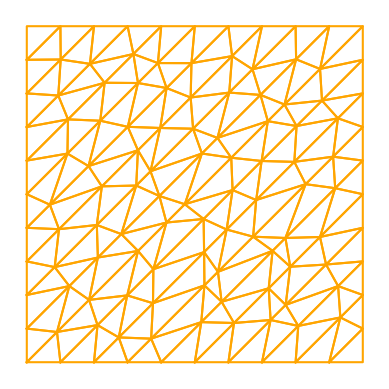

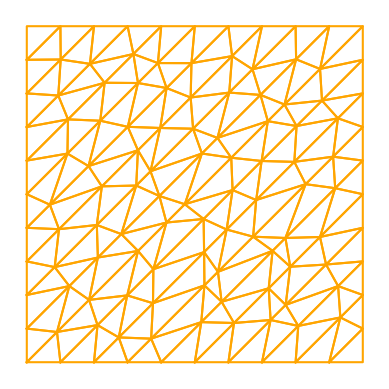

2


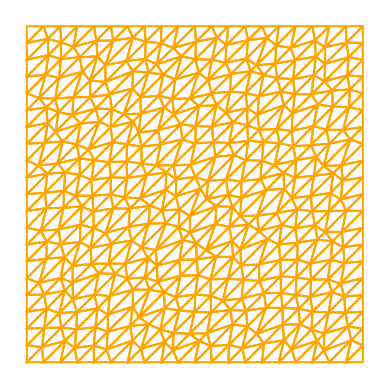

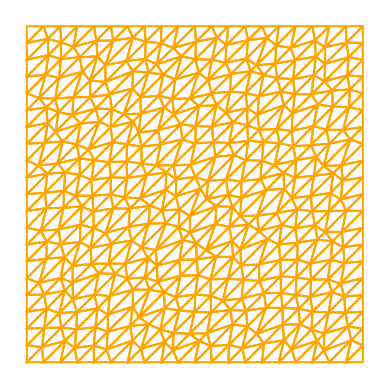

3


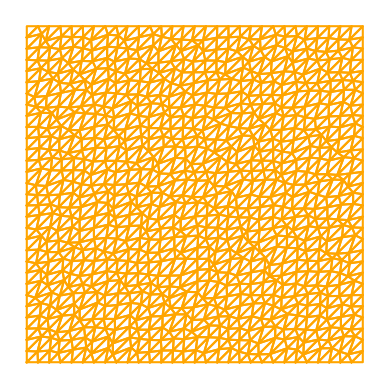

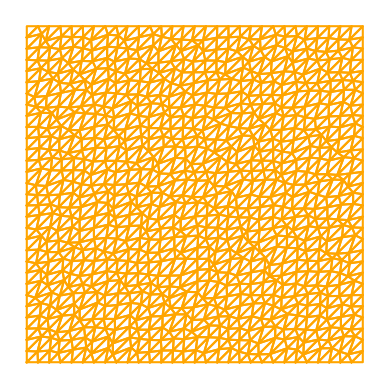

4


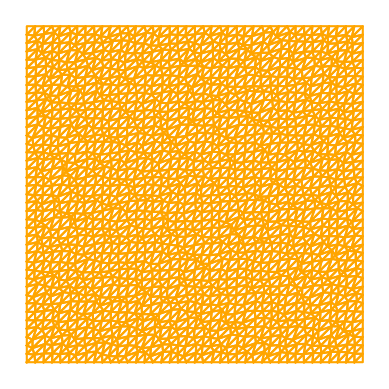

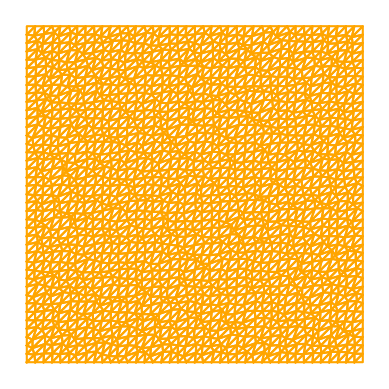

5


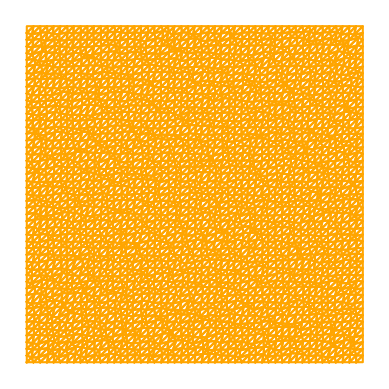

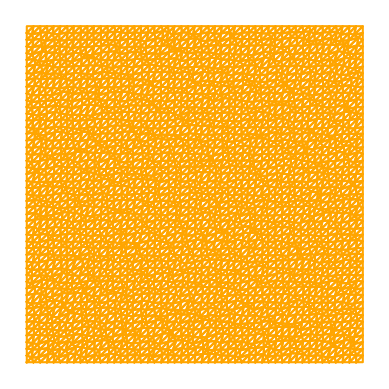

6


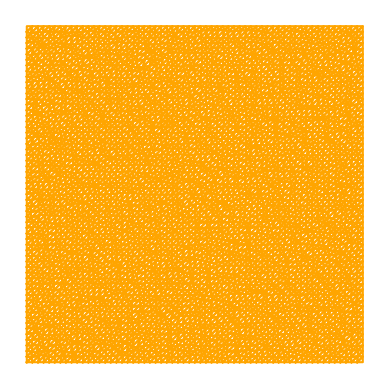

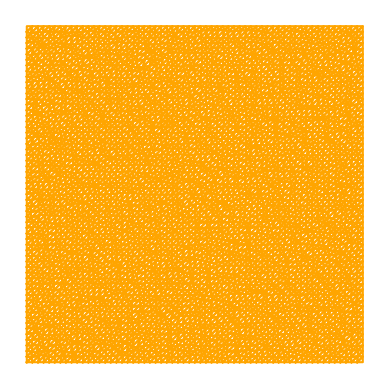

7


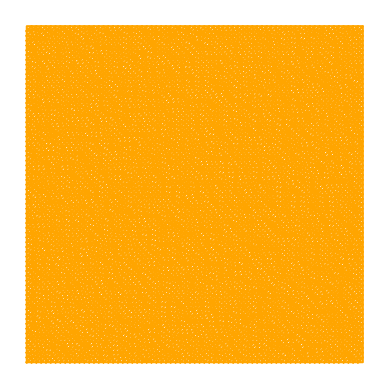

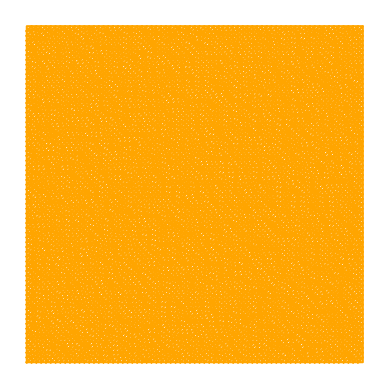

8


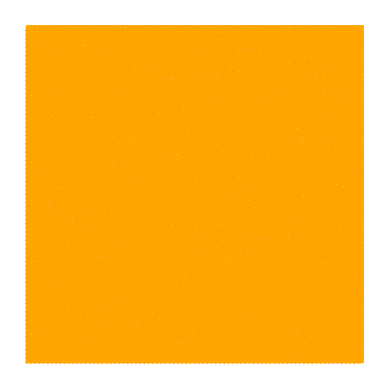

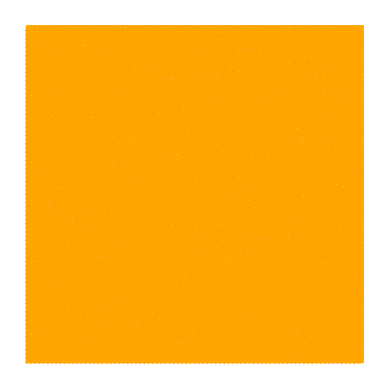

9


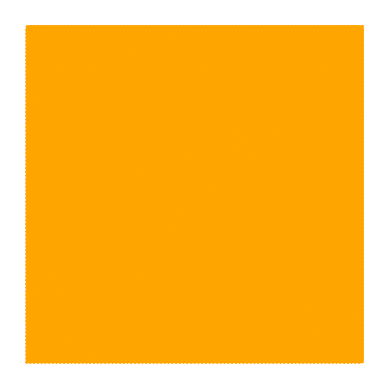

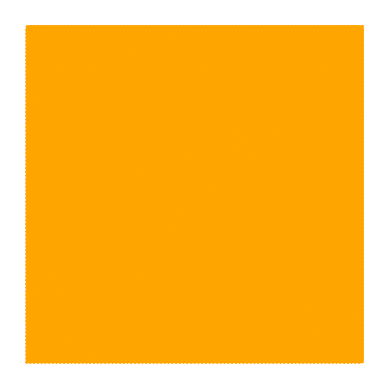

End.


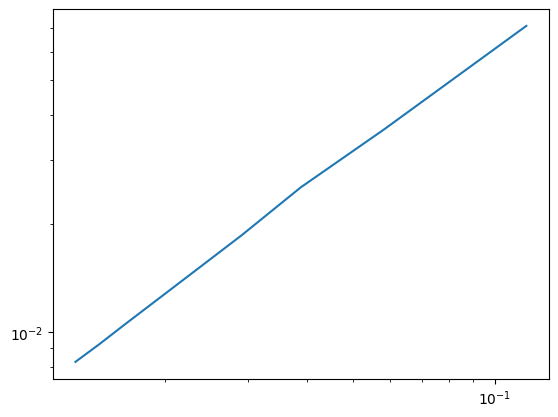

In [ ]:
# -*- coding: utf-8 -*-
"""
..warning:: The explanations of the functions in this file and the details of
the programming methodology have been given during the lectures.
"""


# Python packages
import matplotlib.pyplot
import matplotlib.pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy
import os
import scipy.io
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import sys


# MRG packages
import zsolutions4students as solutions

def h_moy(node_coords, p_elem2nodes, elem2nodes) :
  h= 0
  for elem in range(p_elem2nodes.shape[0]-1) :
    nodes=elem2nodes[p_elem2nodes[elem]:p_elem2nodes[elem+1]]
    l=[]
    for i in range(3):
      l.append(np.sqrt(((node_coords[nodes[i]]-node_coords[nodes[(i+1)%3]])**2).sum()))
    h+= sum(l)/3
  return h/ (p_elem2nodes.shape[0]-1)
# ..todo: Uncomment for displaying limited digits
# numpy.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})


def run_exercise_solution_helmholtz_dddd(n):

    # -- set equation parameters
    wavenumber = numpy.pi
        # -- set geometry parameters
    xmin, xmax, ymin, ymax = 0.0, 1.0, 0.0, 1.0
    nelemsx, nelemsy = n,n

    # -- generate mesh
    nnodes = (nelemsx + 1) * (nelemsy + 1)
    nelems = nelemsx * nelemsy * 2
    node_coords, p_elem2nodes, elem2nodes, node_l2g = solutions._set_square_trimesh(xmin, xmax, ymin, ymax, nelemsx, nelemsy)
    node_coords, p_elem2nodes, elem2nodes = shift(node_coords, p_elem2nodes, elem2nodes)

    nnodes = node_coords.shape[0]
    nelems = len(p_elem2nodes)-1

    # -- plot mesh
    fig = matplotlib.pyplot.figure(1)
    ax = matplotlib.pyplot.subplot(1, 1, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    solutions._plot_mesh(p_elem2nodes, elem2nodes, node_coords, color='orange')
    matplotlib.pyplot.show()

    # -- set boundary geometry
    # boundary composed of nodes
    # .. todo:: Modify the lines below to select the ids of the nodes on the boundary of the different geometry.
    nodes_on_north = solutions._set_square_nodes_boundary_north(node_coords)
    nodes_on_south = solutions._set_square_nodes_boundary_south(node_coords)
    nodes_on_east = solutions._set_square_nodes_boundary_east(node_coords)
    nodes_on_west = solutions._set_square_nodes_boundary_west(node_coords)
    nodes_on_boundary = numpy.unique(numpy.concatenate((nodes_on_north, nodes_on_south, nodes_on_east, nodes_on_west)), )

    # ..warning: for teaching purpose only
    # -- set exact solution
    solexact = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    laplacian_of_solexact = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    for i in range(nnodes):
        x, y, z = node_coords[i, 0], node_coords[i, 1], node_coords[i, 2]
        # set: u(x,y) = e^{ikx}
        solexact[i] = numpy.exp(complex(0,1)*wavenumber*x)
        laplacian_of_solexact[i] = complex(0,1)*wavenumber*complex(0,1)*wavenumber * solexact[i]
    # ..warning: end

    # -- set dirichlet boundary conditions
    values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    values_at_nodes_on_boundary[nodes_on_boundary] = solexact[nodes_on_boundary]

    # -- set finite element matrices and right hand side
    f_unassembled = numpy.zeros((nnodes, 1), dtype=numpy.complex128)

    # ..warning: for teaching purpose only
    for i in range(nnodes):
        # evaluate: (-\Delta - k^2) u(x,y) = ...
        f_unassembled[i] = - laplacian_of_solexact[i] - (wavenumber ** 2) * solexact[i]
    # ..warning: end

    coef_k = numpy.ones((nelems, 1), dtype=numpy.complex128)
    coef_m = numpy.ones((nelems, 1), dtype=numpy.complex128)
    K, M, F = solutions._set_fem_assembly(p_elem2nodes, elem2nodes, node_coords, f_unassembled, coef_k, coef_m)
    A = K - wavenumber**2 * M
    B = F

    # -- apply Dirichlet boundary conditions
    A, B = solutions._set_dirichlet_condition(nodes_on_boundary, values_at_nodes_on_boundary, A, B)

    # -- solve linear system
    sol = scipy.linalg.solve(A, B)

    # -- plot finite element solution
    solreal = sol.reshape((sol.shape[0], ))
    # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solreal))
    # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solreal))
    #
    # ..warning: for teaching purpose only
    # -- plot exact solution
    solexactreal = solexact.reshape((solexact.shape[0], ))
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solexactreal))
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solexactreal))
    # # ..warning: end

    # ..warning: for teaching purpose only
    # -- plot exact solution - approximate solution
    solerr = solreal - solexactreal
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solerr))
   # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solerr))
    # # ..warning: end
    h= h_moy(node_coords, p_elem2nodes, elem2nodes)
    return numpy.linalg.norm(solerr),h

import matplotlib.pyplot as plt
import numpy as np
if __name__ == '__main__':
    l=[]
    x= []
    for i in range(1,10) :
      print(i)
      p= i*10
      x.append(run_exercise_solution_helmholtz_dddd(p)[1])
      l.append(run_exercise_solution_helmholtz_dddd(p)[0])

    plt.loglog(x,l)
    print('End.')


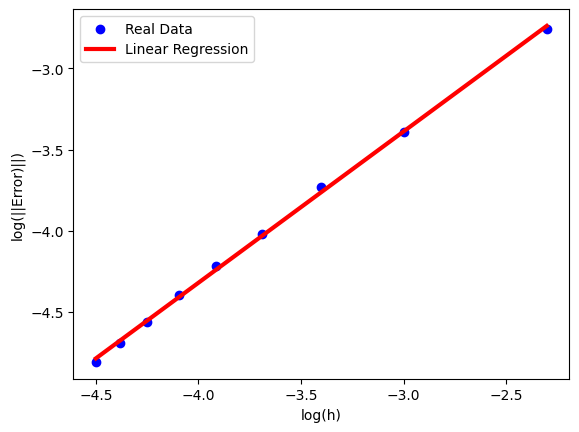

Polynomial Coefficients: [ 0.93412085 -0.58629323]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Reshape the input data
X = np.log(x)
Y = np.log(l)


# Assuming you have x and l defined somewhere in your code
# x = ...
# l = ...

# Degree of the polynomial you want to fit
degree = 1  # Change this to the desired degree of the polynomial

# Fit the polynomial regression model using polyfit
coefficients = np.polyfit(X, Y, degree)

# Create the polynomial approximation function
poly_function = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(X), max(X), 10)

# Compute corresponding y values using the polynomial function
y_values = poly_function(x_values)

# Plot the real data and the polynomial approximation
plt.scatter(X, Y, color='blue', label='Real Data')  # Real data points
plt.plot(x_values, y_values, color='red', linewidth=3, label='Linear Regression')  # Polynomial regression line
plt.xlabel('log(h)')
plt.ylabel('log(||Error)||)')
plt.legend()
plt.show()

# Print the coefficients of the polynomial regression model
print("Polynomial Coefficients:", coefficients)


# error as function of K

4


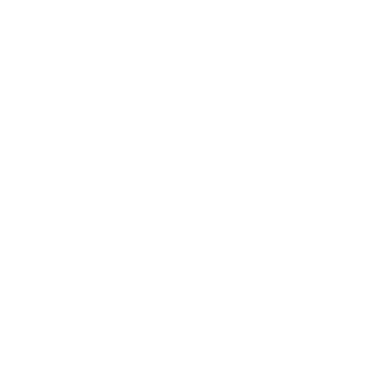

5


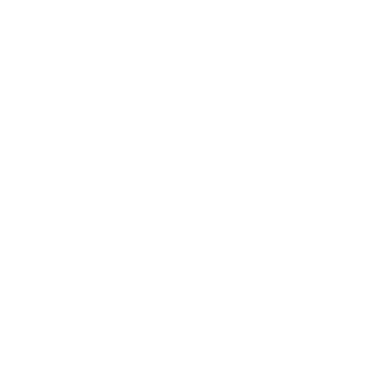

6


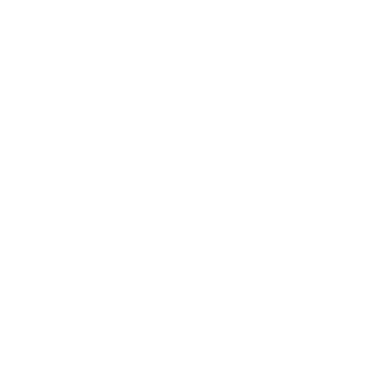

7


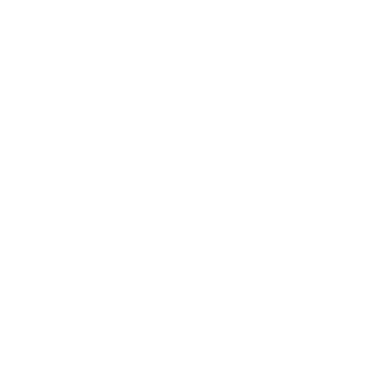

8


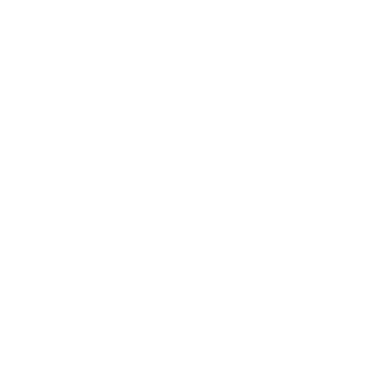

9


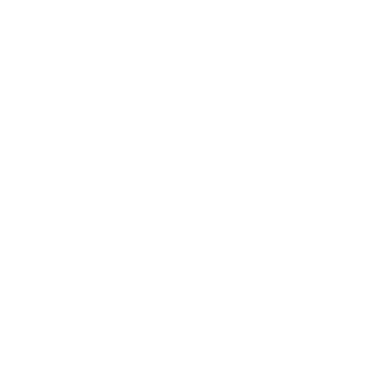

10


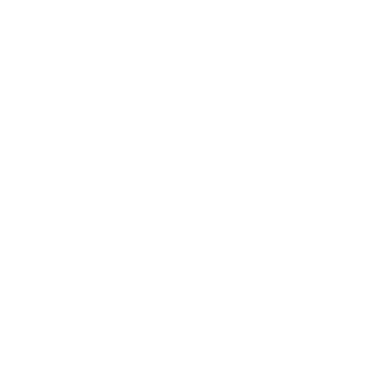

11


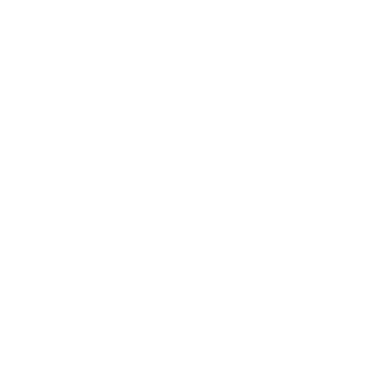

12


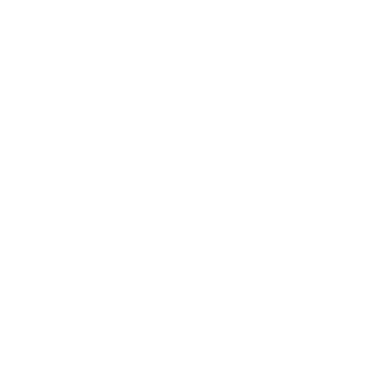

13


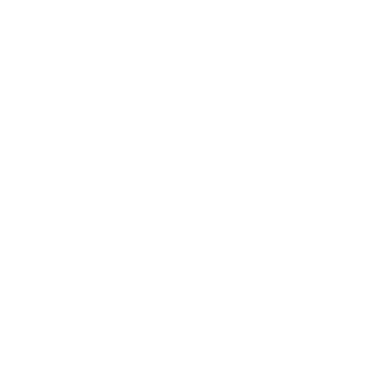

14


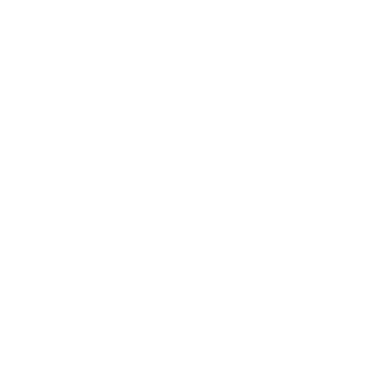

15


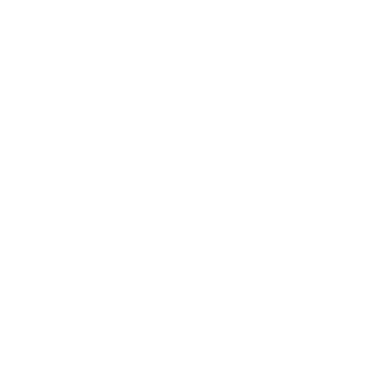

16


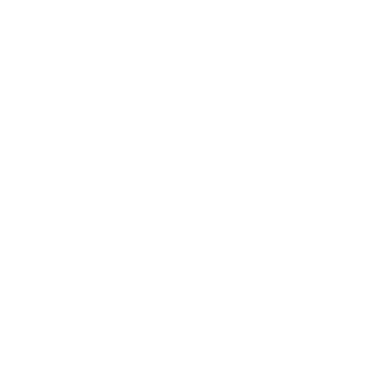

17


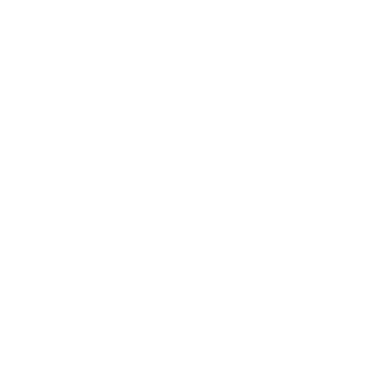

18


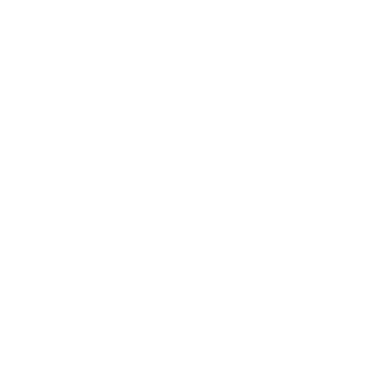

19


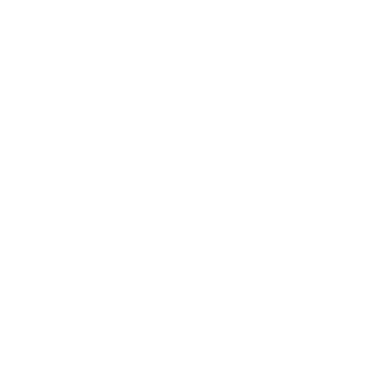

End.


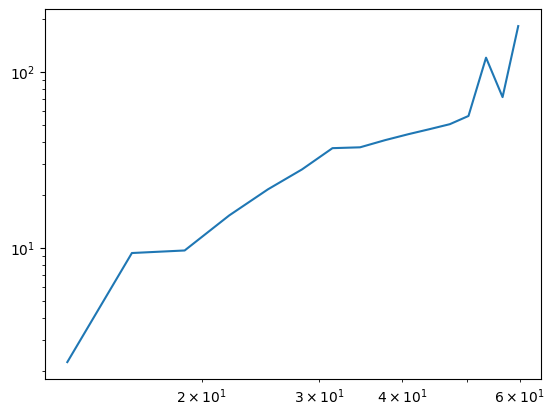

In [ ]:
# -*- coding: utf-8 -*-
"""
..warning:: The explanations of the functions in this file and the details of
the programming methodology have been given during the lectures.
"""


# Python packages
import matplotlib.pyplot
import matplotlib.pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy
import os
import scipy.io
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import sys


# MRG packages
import zsolutions4students as solutions


# ..todo: Uncomment for displaying limited digits
# numpy.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})


def run_exercise_solution_helmholtz_dddd(wave):
    n = 80
    # -- set equation parameters
    wavenumber = wave
    # -- set geometry parameters
    xmin, xmax, ymin, ymax = 0.0, 1.0, 0.0, 1.0
    nelemsx, nelemsy = n,n

    # -- generate mesh
    nnodes = (nelemsx + 1) * (nelemsy + 1)
    nelems = nelemsx * nelemsy * 2
    node_coords, p_elem2nodes, elem2nodes, node_l2g = solutions._set_square_trimesh(xmin, xmax, ymin, ymax, nelemsx, nelemsy)
    node_coords, p_elem2nodes, elem2nodes = shift(node_coords, p_elem2nodes, elem2nodes)

    # .. todo:: Modify the line below to define a different geometry.
    # p_elem2nodes, elem2nodes, node_coords, node_l2g = ...
    nnodes = node_coords.shape[0]
    nelems = len(p_elem2nodes)-1

    # -- plot mesh
    fig = matplotlib.pyplot.figure(1)
    ax = matplotlib.pyplot.subplot(1, 1, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    #solutions._plot_mesh(p_elem2nodes, elem2nodes, node_coords, color='orange')
    matplotlib.pyplot.show()

    # -- set boundary geometry
    # boundary composed of nodes
    # .. todo:: Modify the lines below to select the ids of the nodes on the boundary of the different geometry.
    nodes_on_north = solutions._set_square_nodes_boundary_north(node_coords)
    nodes_on_south = solutions._set_square_nodes_boundary_south(node_coords)
    nodes_on_east = solutions._set_square_nodes_boundary_east(node_coords)
    nodes_on_west = solutions._set_square_nodes_boundary_west(node_coords)
    nodes_on_boundary = numpy.unique(numpy.concatenate((nodes_on_north, nodes_on_south, nodes_on_east, nodes_on_west)), )
    # ..warning: the ids of the nodes on the boundary should be 'global' number.
    # nodes_on_boundary = ...

    # ..warning: for teaching purpose only
    # -- set exact solution
    solexact = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    laplacian_of_solexact = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    for i in range(nnodes):
        x, y, z = node_coords[i, 0], node_coords[i, 1], node_coords[i, 2]
        # set: u(x,y) = e^{ikx}
        solexact[i] = numpy.exp(complex(0,1)*wavenumber*x)
        laplacian_of_solexact[i] = complex(0,1)*wavenumber*complex(0,1)*wavenumber * solexact[i]
    # ..warning: end

    # -- set dirichlet boundary conditions
    values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
    values_at_nodes_on_boundary[nodes_on_boundary] = solexact[nodes_on_boundary]

    # -- set finite element matrices and right hand side
    f_unassembled = numpy.zeros((nnodes, 1), dtype=numpy.complex128)

    # ..warning: for teaching purpose only
    for i in range(nnodes):
        # evaluate: (-\Delta - k^2) u(x,y) = ...
        f_unassembled[i] = - laplacian_of_solexact[i] - (wavenumber ** 2) * solexact[i]
    # ..warning: end

    coef_k = numpy.ones((nelems, 1), dtype=numpy.complex128)
    coef_m = numpy.ones((nelems, 1), dtype=numpy.complex128)
    K, M, F = solutions._set_fem_assembly(p_elem2nodes, elem2nodes, node_coords, f_unassembled, coef_k, coef_m)
    A = K - wavenumber**2 * M
    B = F

    # -- apply Dirichlet boundary conditions
    A, B = solutions._set_dirichlet_condition(nodes_on_boundary, values_at_nodes_on_boundary, A, B)

    # -- solve linear system
    sol = scipy.linalg.solve(A, B)

    # -- plot finite element solution
    solreal = sol.reshape((sol.shape[0], ))
    # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solreal))
    # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solreal))
    #
    # ..warning: for teaching purpose only
    # -- plot exact solution
    solexactreal = solexact.reshape((solexact.shape[0], ))
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solexactreal))
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solexactreal))
    # # ..warning: end

    # ..warning: for teaching purpose only
    # -- plot exact solution - approximate solution
    solerr = solreal - solexactreal
    #_ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.real(solerr))
   # _ = solutions._plot_contourf(nelems, p_elem2nodes, elem2nodes, node_coords, numpy.imag(solerr))
    # # ..warning: end

    return numpy.linalg.norm(solerr)

import matplotlib.pyplot as plt
import numpy as np
if __name__ == '__main__':
    l1=[]
    x1= []
    for i in range(4,20) :
      print(i)
      p= numpy.pi*i
      x1.append(p)
      l1.append(run_exercise_solution_helmholtz_dddd(p))

    plt.loglog(x1,l1)
    print('End.')


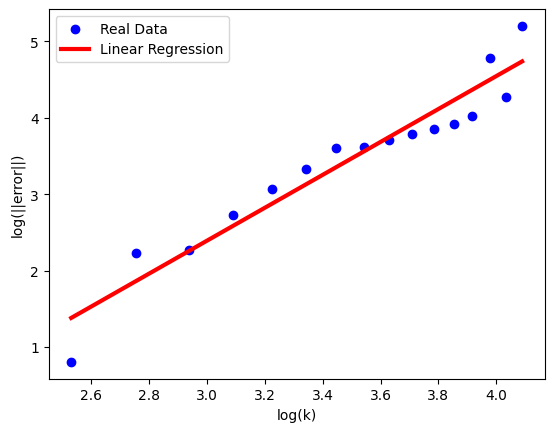

Polynomial Coefficients: [ 2.15318019 -4.06843573]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Reshape the input data
X = np.log(x1)
Y = np.log(l1)


# Assuming you have x and l defined somewhere in your code
# x = ...
# l = ...

# Degree of the polynomial you want to fit
degree = 1  # Change this to the desired degree of the polynomial

# Fit the polynomial regression model using polyfit
coefficients = np.polyfit(X, Y, degree)

# Create the polynomial approximation function
poly_function = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(X), max(X), 10)

# Compute corresponding y values using the polynomial function
y_values = poly_function(x_values)

# Plot the real data and the polynomial approximation
plt.scatter(X, Y, color='blue', label='Real Data')  # Real data points
plt.plot(x_values, y_values, color='red', linewidth=3, label='Linear Regression')  # Polynomial regression line
plt.xlabel('log(k)')
plt.ylabel('log(||error||)')
plt.legend()
plt.show()

# Print the coefficients of the polynomial regression model
print("Polynomial Coefficients:", coefficients)
